#### This script was originated from: job004f_plot_loadFromPickles_dey_scanOverAyy_NowakesVSwakes-Copy1.ipynb

In [1]:
import sys
sys.path.append('../../../utils/')
from cmptTheoreticalEmitGrowth import *
from bunchLengthConversions import *
from coordinatesConversions import *
from cmpt_TuneSpreads import *

import numpy as np
import pickle

import pandas as pd
import matplotlib.pyplot as plt

### Plotting parameters

In [2]:
params = {'legend.fontsize': 20,
          'figure.figsize': (9.5, 8.5),
          'axes.labelsize': 27,
          'axes.titlesize': 23,
          'xtick.labelsize': 27,
          'ytick.labelsize': 27,
          'image.cmap': 'jet',
          'lines.linewidth': 1,
          'lines.markersize': 10,
          'font.family': 'sans-serif'}

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

### Study parameters

In [3]:
n_sets = 20
n_turns = int(1e5)            # number of cycles to run the simulation for
decTurns = int(100)           # how often to record data
circumference  = 6911.5623 # [m]
f_rev  = 299792458/circumference  # [Hz] The revolution frequency of the machine 
separationTime = 1 / f_rev * decTurns #There are decTurns revolutions before each recording of data
tspan = (np.arange(n_turns / decTurns) + 1.0) * separationTime #total time spanned by the simulation

In [9]:
my_start = -2e4  
my_stop = 2.01e4 
my_step = 2000.0

my_variables = list(np.arange(my_start, my_stop, my_step))
#my_variables.insert(0,0.0)
print(my_variables)
print(len(my_variables))

[-20000.0, -18000.0, -16000.0, -14000.0, -12000.0, -10000.0, -8000.0, -6000.0, -4000.0, -2000.0, 0.0, 2000.0, 4000.0, 6000.0, 8000.0, 10000.0, 12000.0, 14000.0, 16000.0, 18000.0, 20000.0]
21


In [12]:
path2octupoles_matching_data  = '/home/natalia/PhD_projects/exploring_SPS/match_octupoles/'
#study_list_optionA = ['matching_results_constraintaxy0_b3b5b7_QpxQpy1_negativeayy.pkl', 'matching_results_constraintaxy0_b3b5b7_QpxQpy1_positiveayy.pkl']
study_list_option = ['matching_results_Noconstraintaxy_nob3b5b7_QpxQpy1_negativeayy.pkl', 'matching_results_Noconstraintaxy_nob3b5b7_QpxQpy1_positiveayy.pkl']


In [51]:
axy_list, ayy_list = [], []
klod_list, klof_list = [], []

for study in study_list_option:
    df = pd.read_pickle(path2octupoles_matching_data+study)
    axy_temp = np.array(df.axy)
    ayy_temp = np.array(df.ayy)
    klod_temp = np.array(df.klod)
    klof_temp = np.array(df.klof)
    
    if study == study_list_option[0]:
        axy_temp = axy_temp[1:] # remove duplicate element for ayy=0
        ayy_temp = ayy_temp[1:]
        klod_temp = klod_temp[1:]
        klof_temp = klof_temp[1:]        
        
        axy_temp = axy_temp[::-1]
        ayy_temp = ayy_temp[::-1]
        klod_temp = klod_temp[::-1]
        klof_temp = klof_temp[::-1]

    for i in range(len(axy_temp)):
        if i ==0 and study ==study_list_option[1] :
            axy_list.append(axy_temp[i])
            ayy_list.append(ayy_temp[i])
            klof_list.append(klof_temp[i])
            klod_list.append(klod_temp[i])
        else:
            axy_list.append(axy_temp[i][0])
            ayy_list.append(ayy_temp[i][0])
            klof_list.append(klof_temp[i][0])
            klod_list.append(klod_temp[i][0])
            


### Load the data

In [17]:
path_to_data = './'
QpxQpy="1"
study_name = f'deyRates_updated_sps_270GeV_PN1e-8_400MHz_wakesOFFvsON_QpxQpy{QpxQpy}_6D_Nb5e5_turns1e5_4sigmat1_7ns_ayyScan' # title for save figures
study_name_1 = f'deyRates_updated_sps_270GeV_CC_PN_400MHz_wakesOFF_QpxQpy{QpxQpy}_6D_Nb5e5_turns1e5_4sigmat1_7ns_ayyScan'
#study_name_2 = f'deyRates_updated_sps_270GeV_CC_PN_400MHz_wakesON_QpxQpy{QpxQpy}_6D_Nb5e5_turns1e5_4sigmat1_7ns_ayyScan'
study_name_2 = f'deyRates_sps_270GeV_PN1e-8_400MHz_y-plane_WakesON_QpxQpy1_6D_Nb5e5_intensity3e10_ayyScan'
noise_type = 'PN'

my_df_1 = pickle.load( open(path_to_data+study_name_1+'.pkl', "rb" ))
my_df_2 = pickle.load( open(path_to_data+study_name_2+'.pkl', "rb" ) )

In [18]:
my_df_2

,ayy_-20000.0,ayy_-18000.0,ayy_-16000.0,ayy_-14000.0,ayy_-12000.0,ayy_-10000.0,ayy_-8000.0,ayy_-6000.0,ayy_-4000.0,ayy_-2000.0,...,ayy_2000.0,ayy_4000.0,ayy_6000.0,ayy_8000.0,ayy_10000.0,ayy_12000.0,ayy_14000.0,ayy_16000.0,ayy_18000.0,ayy_20000.0
m,[],"[2.456447909801269e-08, 2.4729974937898323e-08...","[2.432516096211756e-08, 2.4547845687063846e-08...","[2.386927926097225e-08, 2.348240686155764e-08,...","[2.3804160165118214e-08, 2.3666629129703277e-0...","[2.3122570492994176e-08, 2.266056030803552e-08...","[2.372754038521878e-08, 2.0949224103588612e-08...","[2.5298515618485582e-08, 2.040618169720106e-08...","[2.0125382205587737e-08, 1.737571390065739e-08...","[8.677973867629547e-09, 7.551327530544992e-09,...",...,"[7.918064773907814e-09, 7.286370097666369e-09,...","[1.0995246619901834e-08, 1.1455426675762605e-0...","[1.6447228505836236e-08, 1.552378353458427e-08...","[1.8940551911994303e-08, 2.0971718191630878e-0...","[2.1510935110021416e-08, 2.2145489081464106e-0...","[2.30628906867716e-08, 2.408445897955105e-08, ...","[2.588514750029514e-08, 2.642684507276659e-08,...","[2.690215154022461e-08, 2.772688348092061e-08,...","[2.597400609165457e-08, 2.9925462670366524e-08...","[2.5909936974393395e-08, 3.0592648792341236e-0..."
b,[],"[2.30090021548548e-06, 2.3006872817057087e-06,...","[2.300911318141626e-06, 2.2956797047757093e-06...","[2.302515414605286e-06, 2.299694806067785e-06,...","[2.298484159880949e-06, 2.2965442588723543e-06...","[2.3012066034098094e-06, 2.296502155997208e-06...","[2.3023673871799595e-06, 2.2998333017362397e-0...","[2.301731974833206e-06, 2.2978625132724375e-06...","[2.3008362115235894e-06, 2.2974622308096034e-0...","[2.3014766218608295e-06, 2.2999066052830813e-0...",...,"[2.302624546459497e-06, 2.3008418758449455e-06...","[2.3003069636059697e-06, 2.2977334878212896e-0...","[2.3012619620851194e-06, 2.3016194258001266e-0...","[2.303448259376534e-06, 2.301020991646181e-06,...","[2.2987892639334566e-06, 2.3010405343875743e-0...","[2.303792591756684e-06, 2.2981918192797283e-06...","[2.3002045358068464e-06, 2.2975351246395136e-0...","[2.3020589868005516e-06, 2.2978899096466006e-0...","[2.29957540880641e-06, 2.295642414110671e-06, ...","[2.3031575967010834e-06, 2.298139862434551e-06..."
err,[],"[4.009692497224962e-11, 4.0442078283750895e-11...","[4.140348946635242e-11, 4.8376809564090104e-11...","[3.988714185906686e-11, 3.7965044771431994e-11...","[3.587213775931689e-11, 3.7655208018386185e-11...","[4.346141366374953e-11, 3.724228005208266e-11,...","[4.428494474247222e-11, 3.526909440298457e-11,...","[5.145420353343123e-11, 6.446506271642753e-11,...","[8.063828360259046e-11, 7.712908664710179e-11,...","[3.151351113769638e-11, 2.3060542301669408e-11...",...,"[2.339116740905911e-11, 2.3085435821087742e-11...","[7.628584600157565e-11, 5.6117969967387655e-11...","[1.1728733727222444e-10, 9.967053709606416e-11...","[8.750125503354614e-11, 9.984795003193741e-11,...","[1.012112285631379e-10, 8.125326765177914e-11,...","[9.570846568379334e-11, 5.2311602236915396e-11...","[9.165290868705092e-11, 8.674133062101583e-11,...","[9.014877160276976e-11, 1.1690842253176618e-10...","[8.191713316737297e-11, 1.328186746018263e-10,...","[7.138559528773687e-11, 1.299342682001401e-10,..."


In [19]:
my_df_keys = list(my_df_2.keys()) # same keys for both data Frames
print(my_df_keys)

['ayy_-20000.0', 'ayy_-18000.0', 'ayy_-16000.0', 'ayy_-14000.0', 'ayy_-12000.0', 'ayy_-10000.0', 'ayy_-8000.0', 'ayy_-6000.0', 'ayy_-4000.0', 'ayy_-2000.0', 'ayy_0.0', 'ayy_2000.0', 'ayy_4000.0', 'ayy_6000.0', 'ayy_8000.0', 'ayy_10000.0', 'ayy_12000.0', 'ayy_14000.0', 'ayy_16000.0', 'ayy_18000.0', 'ayy_20000.0']


### Compute error bars

Let's assume:

\begin{equation}
y_1 = a_1 x \pm err_1 \\
y_2 = a_2 x \pm err_2 \\
y_3 = a_3 x \pm err_3
\end{equation}

where $a_1, a_2, a_3$ is the growth rates obtained from a linear fit on the simulation data and $err_1, err_2, err_3$ the error of the linear fit. 


Then the systematic error is:
\begin{equation}
systematic \ error = std({a_1, a_2, a_3})
\end{equation}

and the statistical errors:
\begin{equation}
statistical \ error = \sqrt{\langle {err_1^2, err_2^2. err_3^2} \rangle} 
\end{equation}.

The total error is:

\begin{equation}
total \ error = \sqrt{(systematic \ error)^2 + (statistical \ error)^2}
\end{equation}

/home/natalia/anaconda3/envs/run_pyheadtail/lib/python3.7/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/home/natalia/anaconda3/envs/run_pyheadtail/lib/python3.7/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/home/natalia/anaconda3/envs/run_pyheadtail/lib/python3.7/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/natalia/anaconda3/envs/run_pyheadtail/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3420: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/natalia/anaconda3/envs/run_pyheadtail/lib/python3.7/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


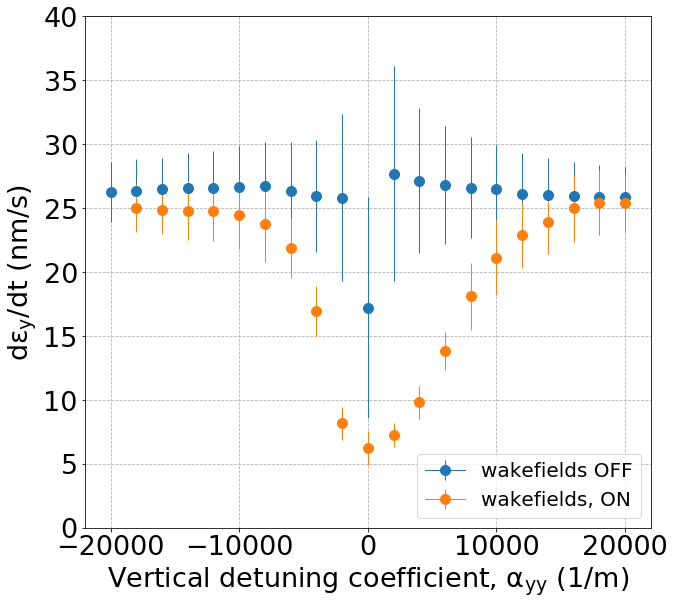

In [20]:
for i, key in enumerate(my_df_keys):
    
    if i ==0:
        my_label_1 = 'wakefields OFF'
        my_label_2 = 'wakefields, ON'
    else:
        my_label_1 = my_label_2 = ''
        
    # errors for study 1
    systematic_error_1 = np.std(my_df_1[my_df_keys[i]]['m'])
    statistical_error_1 = np.sqrt(np.mean(np.array(my_df_1[my_df_keys[i]]['err'])**2))
    total_error_1 = np.sqrt(systematic_error_1**2+statistical_error_1**2)
    
    # errors for study 2
    systematic_error_2 = np.std(my_df_2[my_df_keys[i]]['m'])
    statistical_error_2 = np.sqrt(np.mean(np.array(my_df_2[my_df_keys[i]]['err'])**2))
    total_error_2 = np.sqrt(systematic_error_2**2+statistical_error_2**2)
    
    
    plt.errorbar(my_variables[i], np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, yerr=total_error_1*1e9, marker='o',  c='C0', label=my_label_1)
    plt.errorbar(my_variables[i], np.mean(my_df_2[my_df_keys[i]]['m'])*1e9, yerr=total_error_2*1e9, marker='o',  c='C1', label=my_label_2)
    
    
plt.legend(loc=4)

#plt.xlim(-200, 16000)
plt.ylim(0, 40)
plt.grid(linestyle='dashed')
plt.ylabel(r'$\mathrm{d\epsilon_y / dt \ (nm/s)}$')
plt.xlabel('Vertical detuning coefficient, '+r'$\mathrm{\alpha_{yy} \ (1/m)}$')


plt.tight_layout()

savefig = False
if savefig:
    plt.savefig(f'./figures/{study_name}.png', bbox_inches='tight')

### Compute the theoretically expected rate

In [21]:
# Machine parameters
betay = 73.81671646 # 73 m at CC2, 76 m at CC1
clight = 299792458 # m/s
Vcc = 1e6 # V
Eb = 270e9 # eV
gamma_0 = 287.8 
beta_0 = np.sqrt(1 - 1/gamma_0**2)
circumference = 6911.5623 # m
frev = 299792458/circumference # Hz
tau = 1.7e-9 # 4 sigma_t [s]
sigma_z = clight*tau/4 #0.155  # m
print(f'sigma_z = {sigma_z} m')
f_CC = 400e6 # CC frequency in Hz

# Noise kick parameters
A_phase = 1e-8 # rms kick in the simulation of the phase noise
A_amplitude = 0 # rms kick in the simulation of the amplitude noise
scale_factor = Eb/Vcc # scaling factor to rms noise, σ
# Compute the PSD in rad^2/Hz and V^2/Hz
PSD_phi = (A_phase * scale_factor)**2/frev # rad^2/Hz
#PSD_phi = 1.42e-10
#PSD_phi = 1.4e-10
PSD_A = (A_amplitude * scale_factor)**2/frev # V^2/Hz
print(f'psd phi: {PSD_phi} rad^2/Hz, psd A: {PSD_A} V^2/Hz')

sigma_z = 0.12741179465 m
psd phi: 1.6806723392287607e-10 rad^2/Hz, psd A: 0.0 V^2/Hz


In [22]:
# Compute the correction factor due to the bunch length
sigma_phi = bunch_length_m_to_rad(sigma_z, clight, f_CC)
CDeltaphi = cmpt_bunch_length_correction_factor(sigma_phi, 'PN')
CDeltaA = cmpt_bunch_length_correction_factor(sigma_phi, 'AN')
print('CDeltaPhi = {}, CDeltaA = {}'.format(CDeltaphi, CDeltaA))

if noise_type == 'PN':
    expected_growth = emit_growth_phase_noise(betay, Vcc, frev, Eb, CDeltaphi, PSD_phi, one_sided_psd=False)*beta_0*gamma_0 # m/s
    my_color = 'C0'
    fill_bewtween_color = 'lightblue'
elif noise_type == 'AN':
    expected_growth = emit_growth_amplitude_noise(betay, Vcc, frev, Eb, CDeltaA, PSD_A, one_sided_psd=False)*beta_0*gamma_0 # m/s
    my_color = 'C1'
    fill_bewtween_color = 'moccasin'
else:
    my_color = 'C2'
    expected_growth_1 = emit_growth_phase_noise(betay, Vcc, frev, Eb, CDeltaphi, PSD_phi, one_sided_psd=False)*beta_0*gamma_0 # m/s
    expected_growth_2 = emit_growth_amplitude_noise(betay, Vcc, frev, Eb, CDeltaA, PSD_A, one_sided_psd=False)*beta_0*gamma_0 # m/s
    expected_growth = expected_growth_1 + expected_growth_2

print('expected growth = {} nm/s'.format(expected_growth*1e9))

CDeltaPhi = 0.5510474483948465, CDeltaA = 0.22447627580257676
expected growth = 25.389045082635636 nm/s


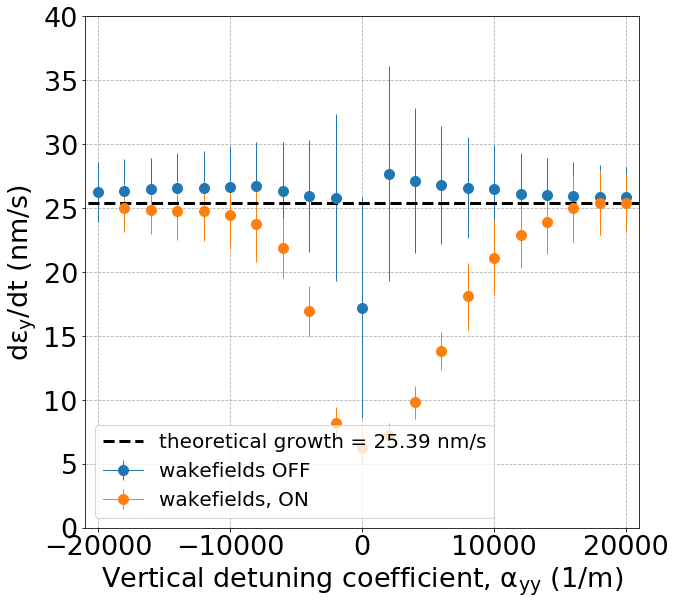

In [23]:
for i, key in enumerate(my_df_keys):
    
    if i ==0:
        my_label_1 = 'wakefields OFF'
        my_label_2 = 'wakefields, ON'
    else:
        my_label_1 = my_label_2 = ''
        
    # errors for study 1
    systematic_error_1 = np.std(my_df_1[my_df_keys[i]]['m'])
    statistical_error_1 = np.sqrt(np.mean(np.array(my_df_1[my_df_keys[i]]['err'])**2))
    total_error_1 = np.sqrt(systematic_error_1**2+statistical_error_1**2)
    
    # errors for study 2
    systematic_error_2 = np.std(my_df_2[my_df_keys[i]]['m'])
    statistical_error_2 = np.sqrt(np.mean(np.array(my_df_2[my_df_keys[i]]['err'])**2))
    total_error_2 = np.sqrt(systematic_error_2**2+statistical_error_2**2)
    
    
    plt.errorbar(my_variables[i], np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, yerr=total_error_1*1e9, marker='o',  c='C0', label=my_label_1)
    plt.errorbar(my_variables[i], np.mean(my_df_2[my_df_keys[i]]['m'])*1e9, yerr=total_error_2*1e9, marker='o',  c='C1', label=my_label_2)
    

plt.hlines(expected_growth*1e9, -22000., 22000., linestyles='dashed', linewidth=3, color='k', label=f'theoretical growth = {expected_growth*1e9:.2f} nm/s')

plt.legend(loc=3)

plt.xlim(-21000, 21000)
plt.ylim(0, 40)

plt.grid(linestyle='dashed')
plt.ylabel(r'$\mathrm{d\epsilon_y / dt \ (nm/s)}$')
plt.xlabel('Vertical detuning coefficient, '+r'$\mathrm{\alpha_{yy} \ (1/m)}$')


plt.tight_layout()

savefig = False
if savefig:
    plt.savefig(f'./figures/{study_name}_vs_Theory.png', bbox_inches='tight')

### Compute the rms detuning with amplitude

In [24]:
#Load the bunch, you need to activate a Pyheadtail version v1.13 or newer
path_to_bunch = '/afs/cern.ch/work/n/natriant/private/pyheadtail_example_crabcavity/'
path_to_bunch='./'
bunch = pickle.load(open(path_to_bunch+'bunch_IPAC', 'rb')) # you need to activate an environment with pyhedtail version at least v1.13.5

PyHEADTAIL v1.13.5




In [25]:
# Optics at CC2
beta_y = 73.81671646
beta_x = 30.31164764
alpha_y = 0
alpha_x = 0

# Coordinates
x, px = bunch.x, bunch.xp
y, py =  bunch.y, bunch.yp

# Normalised coordinates 
x_n, px_n = cmpt_normalised_coordinates(x, px, beta_x, alpha_x)
y_n, py_n = cmpt_normalised_coordinates(y, py, beta_y, alpha_y)


# Compute actions
Jx_init = cmpt_actions(x_n, px_n)
Jy_init = cmpt_actions(y_n, py_n)

rms_Jx_init = np.std(Jx_init)
rms_Jy_init = np.std(Jy_init)

print(f'rms(Jx)={rms_Jx_init} m')
print(f'rms(Jy)={rms_Jy_init} m')

rms(Jx)=7.98866664187745e-09 m
rms(Jy)=7.97627199081245e-09 m


In [26]:
Dqy_rms = []
axy=0
for ayy in my_variables:
    Dqy_rms.append(rms_amplitude_detuning_y(Jy_init, Jx_init, ayy, axy))

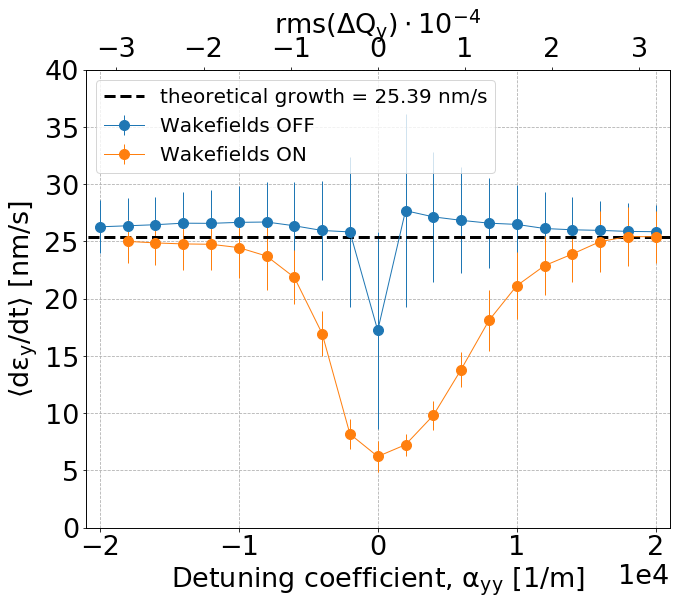

In [27]:
fig, ax = plt.subplots(1,1)

ax2 = ax.twiny()

points_wakes = []
points_no_wakes = []


for i, key in enumerate(my_df_keys):
    
    if i ==0:
        my_label_1 = 'Wakefields OFF'
        my_label_2 = 'Wakefields ON'
    else:
        my_label_1 = my_label_2 = ''
        
    # errors for study 1
    systematic_error_1 = np.std(my_df_1[my_df_keys[i]]['m'])
    statistical_error_1 = np.sqrt(np.mean(np.array(my_df_1[my_df_keys[i]]['err'])**2))
    total_error_1 = np.sqrt(systematic_error_1**2+statistical_error_1**2)
    
    # errors for study 2
    systematic_error_2 = np.std(my_df_2[my_df_keys[i]]['m'])
    statistical_error_2 = np.sqrt(np.mean(np.array(my_df_2[my_df_keys[i]]['err'])**2))
    total_error_2 = np.sqrt(systematic_error_2**2+statistical_error_2**2)
    
    
    ax.errorbar(my_variables[i], np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, yerr=total_error_1*1e9, marker='o',  c='C0', label=my_label_1)
    ax.errorbar(my_variables[i], np.mean(my_df_2[my_df_keys[i]]['m'])*1e9, yerr=total_error_2*1e9, marker='o',  c='C1', label=my_label_2)
    
    points_no_wakes.append(np.mean(my_df_1[my_df_keys[i]]['m'])*1e9)
    points_wakes.append(np.mean(my_df_2[my_df_keys[i]]['m'])*1e9)
    
    
    ax2.plot(np.array(Dqy_rms[i])*1e4, np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, linestyle='')
    ax2.plot(-np.array(Dqy_rms[i])*1e4, np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, linestyle='')


ax.plot(my_variables, points_no_wakes, c='C0')
ax.plot(my_variables, points_wakes, c='C1')
    
ax.hlines(expected_growth*1e9, -22000, 22000, linestyles='dashed', linewidth=3, color='k', label=f'theoretical growth = {expected_growth*1e9:.2f} nm/s')
ax.legend(loc=2)

#ax2.set_xlim(-3*21000*rms_Jy_init*1e4, 3*21000*rms_Jy_init*1e4)
ax2.set_xlim(-np.max(Dqy_rms)-21000*2*rms_Jy_init*1e4, np.max(Dqy_rms)+21000*2*rms_Jy_init*1e4 )
ax.set_xlim(-21000, 21000)


labels = ax.get_xticks()
#ax2.set_xticklabels(abs(labels*1e-4))

ax.set_ylim(0, 40)

ax.grid(linestyle='dashed')

ax.set_ylabel(r'$\mathrm{\langle d\epsilon_y / dt \rangle \ [nm/s]}$')
ax.set_xlabel('Detuning coefficient, '+r'$\mathrm{\alpha_{yy} \ [1/m]}$')
ax.ticklabel_format(axis='x', style='sci', scilimits=(4,4))


ax2.set_xlabel(r'$\mathrm{rms(\Delta Q_y) \cdot 10^{-4}}$', y=15)
plt.tight_layout()

savefig = False
if savefig:
    plt.savefig(f'./figures/{study_name}_vs_TuneSpread_v2.png', bbox_inches='tight')

### Plot expected rms amplitude detuning of SPS for the current settings
- b3b5b7 included 
- chroma match at the current setting (contribution from the chromatic sextupoles)
- klof=klod=1 $1/m^4$
- axy and ayy values as shown below are obtained from MAD-X
    link to script: https://github.com/natriant/exploring_SPS/blob/master/coherent_and_incoherent_tuneShift/job000_cmpt_SPS_detuning_ceofficients_madx.ipynb

In [28]:
if QpxQpy == "0":  
    axy_sps = -1484.124066 # for Qpx=Qpy=0
    ayy_sps = 1082.073444 # for Qpx=Qpy=0
elif QpxQpy == "5e-1":  
    axy_sps = -1497.189826 # for Qpx=Qpy=0.5
    ayy_sps = 1081.203394 # for Qpx=Qpy=0.5
elif  QpxQpy == "1":  
    axy_sps = -1510.465536 # for Qpx=Qpy=1
    ayy_sps = 1080.331794 # for Qpx=Qpy=1
elif QpxQpy=="25e-1":
    axy_sps= -1551.55237 # for Qpx=Qpy=2.5
    ayy_sps = 1077.707686 # for Qpx=Qpy=2.5
elif QpxQpy=="5":
    axy_sps = -1624.229435 # for Qpx=Qpy=5
    ayy_sps = 1073.303156 # for Qpx=Qpy=5
print(axy_sps, ayy_sps)

-1510.465536 1080.331794


In [29]:
Dqy_rms_sps = rms_amplitude_detuning_y(Jy_init, Jx_init, ayy_sps, axy_sps)
print(Dqy_rms_sps)

2.9640208780655305e-05


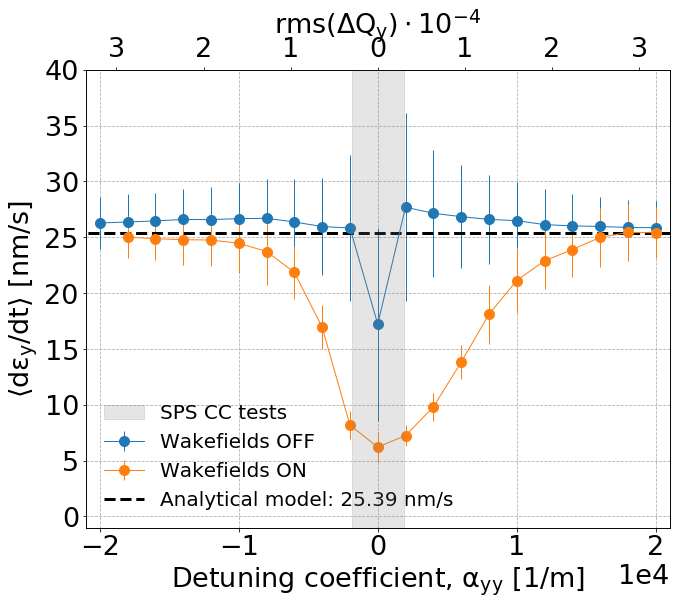

In [30]:
fig, ax = plt.subplots(1,1)

ax2 = ax.twiny()

points_wakes = []
points_no_wakes = []


for i, key in enumerate(my_df_keys):
    
    # errors for study 1
    systematic_error_1 = np.std(my_df_1[my_df_keys[i]]['m'])
    statistical_error_1 = np.sqrt(np.mean(np.array(my_df_1[my_df_keys[i]]['err'])**2))
    total_error_1 = np.sqrt(systematic_error_1**2+statistical_error_1**2)
    
    # errors for study 2
    systematic_error_2 = np.std(my_df_2[my_df_keys[i]]['m'])
    statistical_error_2 = np.sqrt(np.mean(np.array(my_df_2[my_df_keys[i]]['err'])**2))
    total_error_2 = np.sqrt(systematic_error_2**2+statistical_error_2**2)
    
    if i == 0:
        err1 = ax.errorbar(my_variables[i], np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, yerr=total_error_1*1e9, marker='o',  c='C0', label='Wakefields OFF')
        err2 = ax.errorbar(my_variables[i], np.mean(my_df_2[my_df_keys[i]]['m'])*1e9, yerr=total_error_2*1e9, marker='o',  c='C1', label='Wakefields ON')
    else:
        ax.errorbar(my_variables[i], np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, yerr=total_error_1*1e9, marker='o',  c='C0')
        ax.errorbar(my_variables[i], np.mean(my_df_2[my_df_keys[i]]['m'])*1e9, yerr=total_error_2*1e9, marker='o',  c='C1')
        
    points_no_wakes.append(np.mean(my_df_1[my_df_keys[i]]['m'])*1e9)
    points_wakes.append(np.mean(my_df_2[my_df_keys[i]]['m'])*1e9)
    
    
    ax2.plot(np.array(Dqy_rms[i])*1e4, np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, linestyle='')
    ax2.plot(-np.array(Dqy_rms[i])*1e4, np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, linestyle='')


ax.plot(my_variables, points_no_wakes, c='C0')
ax.plot(my_variables, points_wakes, c='C1')
    
theory = ax.hlines(expected_growth*1e9, -22000, 22000, linestyles='dashed', linewidth=3, color='k', label=f'Analytical model: {expected_growth*1e9:.2f} nm/s')

ax2.set_xlim(-np.max(Dqy_rms)-21000*2*rms_Jy_init*1e4, np.max(Dqy_rms)+21000*2*rms_Jy_init*1e4 )
ax.set_xlim(-21000, 21000)

ax2.axvspan(-Dqy_rms_sps*1e4 , Dqy_rms_sps*1e4, alpha=0.2, color='grey', label='SPS CC tests')

ax2.set_xlim(-np.max(Dqy_rms)-21000*2*rms_Jy_init*1e4, np.max(Dqy_rms)+21000*2*rms_Jy_init*1e4 )


labels = ax.get_xticks()


ax.set_yticks(np.arange(0,45,5))
ax2.set_xticks(np.arange(-3, 4,1))
ax2.set_xticklabels(np.abs((np.arange(-3, 4,1))))

ax.set_ylim(-1, 40)

ax.grid(linestyle='dashed')

ax.set_ylabel(r'$\mathrm{\langle d\epsilon_y / dt \rangle \ [nm/s]}$')
ax.set_xlabel('Detuning coefficient, '+r'$\mathrm{\alpha_{yy} \ [1/m]}$')
ax.ticklabel_format(axis='x', style='sci', scilimits=(4,4))

ax2.set_xlabel(r'$\mathrm{rms(\Delta Q_y) \cdot 10^{-4}}$', y=15)
plt.tight_layout()


# legends
ax.legend(loc=3, frameon=False, handles=[err1, err2, theory]) # for CC PN
#ax.legend(loc=3, frameon=False, handles=[err1, err2]) # for dipolar noise

ax2.legend(bbox_to_anchor=(0., 0.1, 0.6, 0.3), frameon=False, loc='center left') # for CC PN
#ax2.legend(bbox_to_anchor=(0., 0.01, 0.6, 0.23), frameon=False) # for dipolar noise

savefig = False
if savefig:
    plt.savefig(f'./figures/{study_name}_vs_TuneSpreadvsExpectedSPS.png', bbox_inches='tight')

## Part B:  Octupole settings

Methodology:
- With MAD-X (path 2 script:) we match the octupoles to the desired ayy values, x-axis in the figure above.
- Matching output: The klof and klod values required to achieve the targeted ayy values.
- From the klof and klod values we compute the required current, I_klof and I_klod respectively. (https://www.overleaf.com/read/bsxyppwxyvfd)



Color code explained:
- green: I_klof AND I_klod <= 100 A
- yellow: (I_klof OR I_klod > 100 A) AND (I_klof AND I_klod <= 200 A)
- red: I_klof or I_klod > 200 A

In [31]:
#### my functions #######3
def cmpt_Brho(pc):
    # pc in GeV
    return pc/(clight*1e-9) # from madx


def cmpt_octupole_coefficient(k3, Brho):
    return k3*Brho

def cmpt_current_klof(O3): # O3 the octupole coefficeintt
    return 500*O3/11779.66

def cmpt_current_klod(O3): # O3 the octupole coefficeintt
    return 500*O3/44490.4

In [32]:
#### Study parameters #####
pc = 270 # GeV
Brho = cmpt_Brho(pc)

In [52]:
O3_klof = cmpt_octupole_coefficient(np.array(klof_list), Brho)
O3_klod = cmpt_octupole_coefficient(np.array(klod_list), Brho)

I_klof = list(cmpt_current_klof(O3_klof))
I_klod = list(cmpt_current_klod(O3_klod))

In [53]:
print(I_klof)

[-46.134696944298895, -41.51399670863052, -36.893296472965154, -32.272596237294565, -27.651896001627478, -23.031195765961275, -18.41049552359166, -13.78979528960713, -9.169095055621698, -4.5483948216359815, 0.07230541235426731, 4.693005646334767, 9.313705880320004, 13.934406114305967, 18.55510634829112, 23.175806590713005, 27.796506826379574, 32.41720706204746, 37.037907297713396, 41.658607533381556, 46.27930776905128]


In [54]:
print(I_klod)

[-189.40083128781365, -170.43106398178745, -151.46129667577364, -132.4915293697384, -113.52176206371749, -94.55199475770027, -75.5822274517891, -56.612460145742084, -37.642692839691385, -18.6729255336395, 0.29684177241082854, 19.266609078461446, 38.23637638451135, 57.20614369056422, 76.1759109966138, 95.14567830252255, 114.11544560854128, 133.0852129145655, 152.05498022058165, 171.02474752660683, 189.9945148326386]


In [55]:
green_list, yellow_list, red_list = [], [], []
indeces = [] # for sanity checks
for i in range(len(ayy_list)):
    if np.abs(I_klof[i]) <= 100 and np.abs(I_klod[i]) <= 100:
        green_list.append(ayy_list[i])
    #elif (np.abs(I_klof[i]) <= 200 and np.abs(I_klod[i]) <=200): #and (np.abs(I_klof[i]) > 100 or np.abs(I_klod[i]) <= 100):
    elif (np.abs(I_klof[i]) > 100 or np.abs(I_klod[i]) > 100) and (np.abs(I_klof[i]) <= 200 and np.abs(I_klod[i]) <=200) :
        yellow_list.append(ayy_list[i])
        indeces.append(i) # for sanity checks
    elif (np.abs(I_klof[i]) > 200) or (np.abs(I_klod[i]) > 200):
        red_list.append(ayy_list[i])
    else:
        print(f'Something went wrong {i}')

In [56]:
Dqy_rms_new = rms_amplitude_detuning_y(Jy_init, Jx_init, np.array(ayy_list), np.array(axy_list))
print(Dqy_rms_new)

[3.58053314e-04 3.21899616e-04 2.85747774e-04 2.49598596e-04
 2.13453434e-04 1.77314745e-04 1.41187499e-04 1.05083500e-04
 6.90392266e-05 3.32494903e-05 7.73842843e-06 4.03668034e-05
 7.62516573e-05 1.12313813e-04 1.48424091e-04 1.84554246e-04
 2.20694517e-04 2.56840632e-04 2.92990430e-04 3.29142696e-04
 3.65296699e-04]


/home/natalia/anaconda3/envs/run_pyheadtail/lib/python3.7/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/home/natalia/anaconda3/envs/run_pyheadtail/lib/python3.7/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/home/natalia/anaconda3/envs/run_pyheadtail/lib/python3.7/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/natalia/anaconda3/envs/run_pyheadtail/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3420: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/natalia/anaconda3/envs/run_pyheadtail/lib/python3.7/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
No handles with labels found to put in legend.


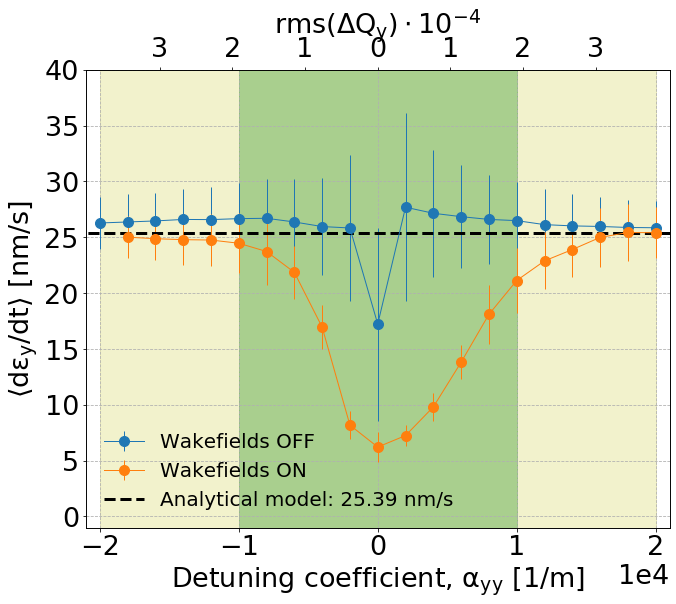

In [57]:
fig, ax = plt.subplots(1,1)

ax2 = ax.twiny()

points_wakes = []
points_no_wakes = []


for i, key in enumerate(my_df_keys):
    
    # errors for study 1
    systematic_error_1 = np.std(my_df_1[my_df_keys[i]]['m'])
    statistical_error_1 = np.sqrt(np.mean(np.array(my_df_1[my_df_keys[i]]['err'])**2))
    total_error_1 = np.sqrt(systematic_error_1**2+statistical_error_1**2)
    
    # errors for study 2
    systematic_error_2 = np.std(my_df_2[my_df_keys[i]]['m'])
    statistical_error_2 = np.sqrt(np.mean(np.array(my_df_2[my_df_keys[i]]['err'])**2))
    total_error_2 = np.sqrt(systematic_error_2**2+statistical_error_2**2)
    
    if i == 0:
        err1 = ax.errorbar(my_variables[i], np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, yerr=total_error_1*1e9, marker='o',  c='C0', label='Wakefields OFF')
        err2 = ax.errorbar(my_variables[i], np.mean(my_df_2[my_df_keys[i]]['m'])*1e9, yerr=total_error_2*1e9, marker='o',  c='C1', label='Wakefields ON')
    else:
        ax.errorbar(my_variables[i], np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, yerr=total_error_1*1e9, marker='o',  c='C0')
        ax.errorbar(my_variables[i], np.mean(my_df_2[my_df_keys[i]]['m'])*1e9, yerr=total_error_2*1e9, marker='o',  c='C1')
        
    points_no_wakes.append(np.mean(my_df_1[my_df_keys[i]]['m'])*1e9)
    points_wakes.append(np.mean(my_df_2[my_df_keys[i]]['m'])*1e9)
    
    
    ax2.plot(np.array(Dqy_rms_new[i])*1e4, np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, linestyle='')
    ax2.plot(-np.array(Dqy_rms_new[i])*1e4, np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, linestyle='')


ax.plot(my_variables, points_no_wakes, c='C0')
ax.plot(my_variables, points_wakes, c='C1')
    
theory = ax.hlines(expected_growth*1e9, -22000, 22000, linestyles='dashed', linewidth=3, color='k', label=f'Analytical model: {expected_growth*1e9:.2f} nm/s')

#ax2.set_xlim(-np.max(Dqy_rms_new)-21000*2*rms_Jy_init*1e4, np.max(Dqy_rms_new)+21000*2*rms_Jy_init*1e4 )
ax.set_xlim(-21000, 21000)

# create colored stripes

    
#ax2.axvspan(-Dqy_rms_sps*1e4 , Dqy_rms_sps*1e4, alpha=0.2, color='grey', label='SPS CC tests')

#ax.axvspan(min(red_list) , max(red_list), alpha=0.1, color='r', label='SPS CC tests')
ax.axvspan(min(yellow_list) , max(yellow_list), alpha=0.2, color='y', label='SPS CC tests')
ax.axvspan(min(green_list) , max(green_list), alpha=0.3, color='g', label='SPS CC tests')


labels = ax.get_xticks()


ax.set_yticks(np.arange(0,45,5))
ax2.set_xticks(np.arange(-3, 4,1))
ax2.set_xticklabels(np.abs((np.arange(-3, 4,1))))

ax.set_ylim(-1, 40)

ax.grid(linestyle='dashed')

ax.set_ylabel(r'$\mathrm{\langle d\epsilon_y / dt \rangle \ [nm/s]}$')
ax.set_xlabel('Detuning coefficient, '+r'$\mathrm{\alpha_{yy} \ [1/m]}$')
ax.ticklabel_format(axis='x', style='sci', scilimits=(4,4))

ax2.set_xlabel(r'$\mathrm{rms(\Delta Q_y) \cdot 10^{-4}}$', y=15)
plt.tight_layout()


# legends
ax.legend(loc=3, frameon=False, handles=[err1, err2, theory]) # for CC PN
#ax.legend(loc=3, frameon=False, handles=[err1, err2]) # for dipolar noise

ax2.legend(bbox_to_anchor=(0., 0.1, 0.6, 0.3), frameon=False, loc='center left') # for CC PN
#ax2.legend(bbox_to_anchor=(0., 0.01, 0.6, 0.23), frameon=False) # for dipolar noise

savefig = False
if savefig:
    plt.savefig(f'./figures/{study_name}_vs_TuneSpreadvsExpectedSPS_octupoles_constraintaxy0_QpxQpy1_b3b5b7.png', bbox_inches='tight')

In [44]:
print(min(green_list))

-20000.000000000622


In [43]:
print(min(yellow_list))

-7999.999999999654


In [45]:
green_list

[-20000.000000000622,
 -17999.999999999567,
 -15999.999999999996,
 -14000.000000000691,
 -11999.999999999432,
 -10000.000000000668,
 1999.9999999999134,
 3999.999999999881,
 5999.999999999919,
 8000.000000000406,
 9999.999999999865,
 12000.000000000366]

In [46]:
yellow_list

[-7999.999999999654,
 -6000.000000000182,
 -3999.9999999998845,
 -1999.9999999999688,
 -3.053089294904046e-12,
 14000.000000000207,
 15999.999999999223,
 17999.999999999134,
 20000.00000000002]

In [128]:
yellow_list


[-4000.000000000026,
 -5000.000000000042,
 -6000.0000000000355,
 2000.0000000000416,
 3000.000000000094,
 3999.999999999933]

## Part C:  Octupole settings

### IPAC style paper

In [19]:
params = {'legend.fontsize': 30,
          'figure.figsize': (9.5, 8.5),
          'axes.labelsize': 30,
          'axes.titlesize': 30,
          'xtick.labelsize': 30,
          'ytick.labelsize': 30,
          'image.cmap': 'jet',
          'lines.linewidth': 1,
          'lines.markersize': 12,
          'font.family': 'sans-serif'}

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

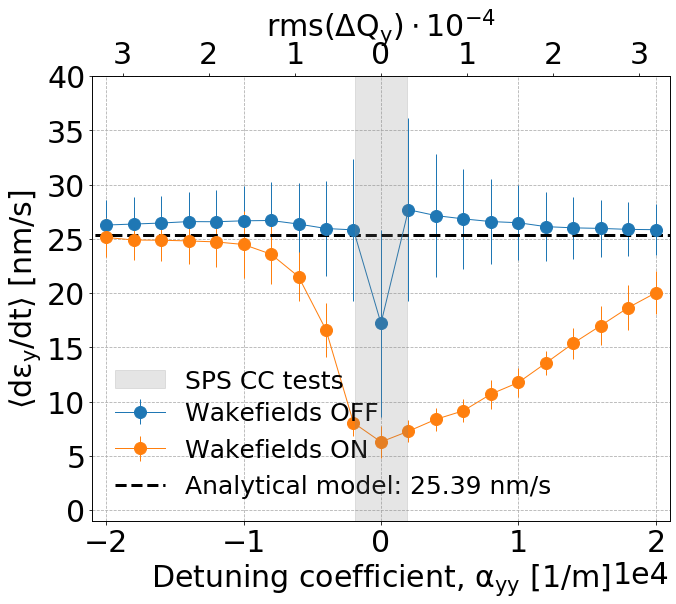

In [20]:
fig, ax = plt.subplots(1,1)

ax2 = ax.twiny()

points_wakes = []
points_no_wakes = []


for i, key in enumerate(my_df_keys):
    
    # errors for study 1
    systematic_error_1 = np.std(my_df_1[my_df_keys[i]]['m'])
    statistical_error_1 = np.sqrt(np.mean(np.array(my_df_1[my_df_keys[i]]['err'])**2))
    total_error_1 = np.sqrt(systematic_error_1**2+statistical_error_1**2)
    
    # errors for study 2
    systematic_error_2 = np.std(my_df_2[my_df_keys[i]]['m'])
    statistical_error_2 = np.sqrt(np.mean(np.array(my_df_2[my_df_keys[i]]['err'])**2))
    total_error_2 = np.sqrt(systematic_error_2**2+statistical_error_2**2)
    
    if i == 0:
        err1 = ax.errorbar(my_variables[i], np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, yerr=total_error_1*1e9, marker='o',  c='C0', label='Wakefields OFF')
        err2 = ax.errorbar(my_variables[i], np.mean(my_df_2[my_df_keys[i]]['m'])*1e9, yerr=total_error_2*1e9, marker='o',  c='C1', label='Wakefields ON')
    else:
        ax.errorbar(my_variables[i], np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, yerr=total_error_1*1e9, marker='o',  c='C0')
        ax.errorbar(my_variables[i], np.mean(my_df_2[my_df_keys[i]]['m'])*1e9, yerr=total_error_2*1e9, marker='o',  c='C1')
        
    points_no_wakes.append(np.mean(my_df_1[my_df_keys[i]]['m'])*1e9)
    points_wakes.append(np.mean(my_df_2[my_df_keys[i]]['m'])*1e9)
    
    
    ax2.plot(np.array(Dqy_rms[i])*1e4, np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, linestyle='')
    ax2.plot(-np.array(Dqy_rms[i])*1e4, np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, linestyle='')


ax.plot(my_variables, points_no_wakes, c='C0')
ax.plot(my_variables, points_wakes, c='C1')
    
theory = ax.hlines(expected_growth*1e9, -22000, 22000, linestyles='dashed', linewidth=3, color='k', label=f'Analytical model: {expected_growth*1e9:.2f} nm/s')

ax2.set_xlim(-np.max(Dqy_rms)-21000*2*rms_Jy_init*1e4, np.max(Dqy_rms)+21000*2*rms_Jy_init*1e4 )
ax.set_xlim(-21000, 21000)

ax2.axvspan(-Dqy_rms_sps*1e4 , Dqy_rms_sps*1e4, alpha=0.2, color='grey', label='SPS CC tests')

ax2.set_xlim(-np.max(Dqy_rms)-21000*2*rms_Jy_init*1e4, np.max(Dqy_rms)+21000*2*rms_Jy_init*1e4 )


labels = ax.get_xticks()


ax.set_yticks(np.arange(0,45,5))
ax2.set_xticks(np.arange(-3, 4,1))
ax2.set_xticklabels(np.abs((np.arange(-3, 4,1))))


ax.set_ylim(-1, 40)

ax.grid(linestyle='dashed')

ax.set_ylabel(r'$\mathrm{\langle d\epsilon_y / dt \rangle \ [nm/s]}$')
ax.set_xlabel('Detuning coefficient, '+r'$\mathrm{\alpha_{yy} \ [1/m]}$')
ax.ticklabel_format(axis='x', style='sci', scilimits=(4,4))

ax2.set_xlabel(r'$\mathrm{rms(\Delta Q_y) \cdot 10^{-4}}$', y=15)
plt.tight_layout()


# legends
ax.legend(loc=3, frameon=False, handles=[err1, err2, theory], fontsize=25) # for CC PN
#ax.legend(loc=3, frameon=False, handles=[err1, err2]) # for dipolar noise

ax2.legend(bbox_to_anchor=(0., 0.165, 0.6, 0.3), frameon=False, fontsize=25,  loc='center left') # for CC PN
#ax2.legend(bbox_to_anchor=(0., 0.01, 0.6, 0.23), frameon=False) # for dipolar noise

savefig = False
if savefig:
    plt.savefig(f'./figures/{study_name}_vs_TuneSpreadvsExpectedSPS_IPAC.png', bbox_inches='tight')

### IPAC style poster/presentation

In [21]:
params = {'legend.fontsize': 30,
          'figure.figsize': (9.5, 8.5),
          'axes.labelsize': 30,
          'axes.titlesize': 30,
          'xtick.labelsize': 30,
          'ytick.labelsize': 30,
          'image.cmap': 'jet',
          'lines.linewidth': 1,
          'lines.markersize': 12,
          'font.family': 'sans-serif'}

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

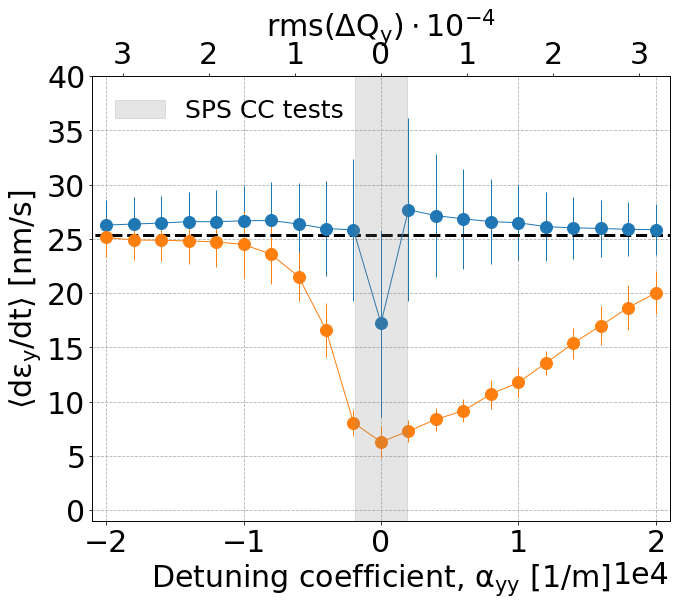

In [38]:
fig, ax = plt.subplots(1,1)

ax2 = ax.twiny()

points_wakes = []
points_no_wakes = []


for i, key in enumerate(my_df_keys):
    
    # errors for study 1
    systematic_error_1 = np.std(my_df_1[my_df_keys[i]]['m'])
    statistical_error_1 = np.sqrt(np.mean(np.array(my_df_1[my_df_keys[i]]['err'])**2))
    total_error_1 = np.sqrt(systematic_error_1**2+statistical_error_1**2)
    
    # errors for study 2
    systematic_error_2 = np.std(my_df_2[my_df_keys[i]]['m'])
    statistical_error_2 = np.sqrt(np.mean(np.array(my_df_2[my_df_keys[i]]['err'])**2))
    total_error_2 = np.sqrt(systematic_error_2**2+statistical_error_2**2)
    
    if i == 0:
        err1 = ax.errorbar(my_variables[i], np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, yerr=total_error_1*1e9, marker='o',  c='C0', label='Wakefields OFF')
        err2 = ax.errorbar(my_variables[i], np.mean(my_df_2[my_df_keys[i]]['m'])*1e9, yerr=total_error_2*1e9, marker='o',  c='C1', label='Wakefields ON')
    else:
        ax.errorbar(my_variables[i], np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, yerr=total_error_1*1e9, marker='o',  c='C0')
        ax.errorbar(my_variables[i], np.mean(my_df_2[my_df_keys[i]]['m'])*1e9, yerr=total_error_2*1e9, marker='o',  c='C1')
        
    points_no_wakes.append(np.mean(my_df_1[my_df_keys[i]]['m'])*1e9)
    points_wakes.append(np.mean(my_df_2[my_df_keys[i]]['m'])*1e9)
    
    
    ax2.plot(np.array(Dqy_rms[i])*1e4, np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, linestyle='')
    ax2.plot(-np.array(Dqy_rms[i])*1e4, np.mean(my_df_1[my_df_keys[i]]['m'])*1e9, linestyle='')


ax.plot(my_variables, points_no_wakes, c='C0')
ax.plot(my_variables, points_wakes, c='C1')
    
theory = ax.hlines(expected_growth*1e9, -22000, 22000, linestyles='dashed', linewidth=3, color='k', label=f'Analytical model: {expected_growth*1e9:.2f} nm/s')

ax2.set_xlim(-np.max(Dqy_rms)-21000*2*rms_Jy_init*1e4, np.max(Dqy_rms)+21000*2*rms_Jy_init*1e4 )
ax.set_xlim(-21000, 21000)

ax2.axvspan(-Dqy_rms_sps*1e4 , Dqy_rms_sps*1e4, alpha=0.2, color='grey', label='SPS CC tests')

ax2.set_xlim(-np.max(Dqy_rms)-21000*2*rms_Jy_init*1e4, np.max(Dqy_rms)+21000*2*rms_Jy_init*1e4 )


labels = ax.get_xticks()


ax.set_yticks(np.arange(0,45,5))
ax2.set_xticks(np.arange(-3, 4,1))
ax2.set_xticklabels(np.abs((np.arange(-3, 4,1))))


ax.set_ylim(-1, 40)

ax.grid(linestyle='dashed')

ax.set_ylabel(r'$\mathrm{\langle d\epsilon_y / dt \rangle \ [nm/s]}$')
ax.set_xlabel('Detuning coefficient, '+r'$\mathrm{\alpha_{yy} \ [1/m]}$')
ax.ticklabel_format(axis='x', style='sci', scilimits=(4,4))

ax2.set_xlabel(r'$\mathrm{rms(\Delta Q_y) \cdot 10^{-4}}$', y=15)
plt.tight_layout()


# legends
#ax.legend(loc=3, frameon=False, handles=[err1, err2, theory], fontsize=25) # for CC PN
#ax.legend(loc=3, frameon=False, handles=[err1, err2]) # for dipolar noise

#ax2.legend(bbox_to_anchor=(0., 0.165, 0.6, 0.3), frameon=False, fontsize=25,  loc='center left') # for CC PN
ax2.legend(frameon=False, fontsize=25, loc=2)
#ax2.legend(bbox_to_anchor=(0., 0.01, 0.6, 0.23), frameon=False) # for dipolar noise

savefig = False
if savefig:
    plt.savefig(f'./figures/{study_name}_vs_TuneSpreadvsExpectedSPS_theory_and_wakesOFF_and_wakesON.png', bbox_inches='tight')

In [25]:
np.mean(my_df_1['ayy_2000.0']['m'])*1e9

28.53868040574884

In [26]:
np.mean(my_df_2['ayy_2000.0']['m'])*1e9

6.099808757994768